In [5]:
!pip install icrawler
# lady: Instalar librería actualizada
!pip install duckduckgo-search --upgrade



In [6]:
from duckduckgo_search import DDGS  # ✅ nueva forma
import os
import requests
from PIL import Image
from io import BytesIO

# lady: Define categorías y términos de búsqueda
categorias = {
    "ropa": "clothes fashion clothing outfit",
    "frutas": "fresh fruits apple banana orange",
    "tecnologia": "laptop computer smartphone",
    "higiene": "soap shampoo toothbrush"
}

os.makedirs("dataset", exist_ok=True)

def descargar_imagenes(categoria, query, cantidad=30):
    ruta = f"dataset/{categoria}"
    os.makedirs(ruta, exist_ok=True)

    with DDGS() as ddgs:
        resultados = ddgs.images(keywords=query, max_results=cantidad)
        for i, resultado in enumerate(resultados):
            try:
                response = requests.get(resultado["image"], timeout=5)
                imagen = Image.open(BytesIO(response.content)).convert("RGB")
                imagen.save(f"{ruta}/{categoria}_{i+1}.jpg")
            except Exception as e:
                print(f"❌ Error con {resultado['image']}: {e}")

# lady: Descargar imágenes por categoría
for categoria, busqueda in categorias.items():
    print(f" Descargando imágenes de {categoria}...")
    descargar_imagenes(categoria, busqueda)


🔽 Descargando imágenes de ropa...
❌ Error con https://thegirlintheyellowdress.com/wp-content/uploads/2017/09/Photo-Jul-14-11-19-55-AM.jpg: cannot identify image file <_io.BytesIO object at 0x7abfe7825710>
🔽 Descargando imágenes de frutas...
❌ Error con https://rare-gallery.com/uploads/posts/889696-Grapes-Bananas-Apples-Kiwi-Orange-fruit-Fruit.jpg: cannot identify image file <_io.BytesIO object at 0x7ac020301300>
❌ Error con https://p0.pikist.com/photos/974/262/fruit-bowl-fruit-bowl-fruits-food-health-pineapple-apples-slim.jpg: cannot identify image file <_io.BytesIO object at 0x7abfff07d3a0>
🔽 Descargando imágenes de tecnologia...
❌ Error con https://edwps.com/wp-content/uploads/2015/12/AdobeStock_85721347.jpeg: cannot identify image file <_io.BytesIO object at 0x7abfff18fd30>
🔽 Descargando imágenes de higiene...
❌ Error con https://png.pngtree.com/png-clipart/20231107/original/pngtree-soap-and-toothbrushes-isolated-wellness-picture-image_13237836.png: cannot identify image file <_io.B

In [7]:
#  Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Definir parámetros básicos
img_size = (100, 100)
batch_size = 16

#  Generadores para entrenamiento y validación (80/20)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

#  Crear modelo CNN simple
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 clases
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#  Entrenar el modelo
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)


Found 251 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/16 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.2512 - loss: 1.9029

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 536ms/step - accuracy: 0.2721 - loss: 1.7857 - val_accuracy: 0.4500 - val_loss: 1.2450
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.4831 - loss: 1.1824 - val_accuracy: 0.5667 - val_loss: 1.0908
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 443ms/step - accuracy: 0.6682 - loss: 0.9420 - val_accuracy: 0.5833 - val_loss: 0.8909
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 372ms/step - accuracy: 0.7286 - loss: 0.7384 - val_accuracy: 0.7167 - val_loss: 0.7531
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 448ms/step - accuracy: 0.8404 - loss: 0.4795 - val_accuracy: 0.6667 - val_loss: 0.8442
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.9022 - loss: 0.3129 - val_accuracy: 0.7500 - val_loss: 0.7445
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - accuracy: 0.9465 - loss: 0.1735 - val_accuracy: 0.6667 - val_loss: 1.0315
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.9552 - loss: 0.1976 - val_accuracy: 0.7500 - va

Saving ropa.jpg to ropa.jpg


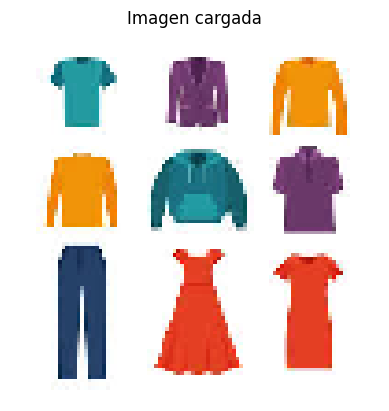

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Predicción: higiene


In [ ]:
# lady: Cargar utilidades
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Subir una imagen desde tu computadora
uploaded = files.upload()

#  Cargar y preparar la imagen
for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=img_size)

    plt.imshow(img)
    plt.title("Imagen cargada")
    plt.axis('off')
    plt.show()

    #  Preprocesar
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    #  Hacer predicción
    prediccion = model.predict(x)
    clases = list(train_generator.class_indices.keys())
    pred_clase = clases[np.argmax(prediccion)]

    print(f" Predicción: {pred_clase}")

# Guardar modelo CNN
model.save("modelo_cnn.h5")

# Descargar el modelo CNN al PC
from google.colab import files
files.download("modelo_cnn.h5")

In [ ]:
# 2. Librerías necesarias
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# 3. Preprocesamiento
img_size = (100, 100)
batch_size = 16

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'dataset',  # Asegúrate que está en la raíz del entorno Colab
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    'dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# 4. Definir el modelo con MobileNetV2
base_model = MobileNetV2(input_shape=(100, 100, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Congelamos las capas base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=predictions)
model_tl.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Entrenamiento
history_tl = model_tl.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)

# 6. Guardar modelo
model_tl.save("modelo_mobilenetv2.h5")

# 7. Descargar modelo al PC
from google.colab import files
files.download("modelo_mobilenetv2.h5")

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("🔼 Selecciona el archivo modelo_mobilenetv2.h5")
uploaded_model = files.upload()
model = load_model(list(uploaded_model.keys())[0])  # Cargar el modelo

print("🔼 Ahora selecciona una imagen para clasificar")
uploaded_image = files.upload()

for fn in uploaded_image.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(100, 100))

    plt.imshow(img)
    plt.title("Imagen cargada")
    plt.axis("off")
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    pred = model.predict(x)

    clases = ['frutas', 'higiene', 'ropa', 'tecnologia']
    print(f"✅ Predicción: {clases[np.argmax(pred)]}")


In [ ]:
#Comparador de modelos CNN vs MobileNetV2
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Subir ambos modelos
print("Sube primero modelo_cnn.h5 y luego modelo_mobilenetv2.h5")
uploaded_models = files.upload()

# Cargar modelos
model_cnn = load_model('modelo_cnn.h5')
model_tl = load_model('modelo_mobilenetv2.h5')

#Subir imagen para probar
print("Sube una imagen para clasificar")
uploaded_image = files.upload()

#Procesar imagen
for fn in uploaded_image.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(100, 100))

    plt.imshow(img)
    plt.axis("off")
    plt.title("Imagen cargada")
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0

    #Definir las clases (ajusta según tus carpetas reales)
    clases = ['frutas', 'higiene', 'ropa', 'tecnologia']

    #Predicción con modelo CNN
    pred_cnn = model_cnn.predict(x)[0]
    idx_cnn = np.argmax(pred_cnn)
    print(f"🧠 CNN Predicción: {clases[idx_cnn]} ({pred_cnn[idx_cnn]*100:.2f}%)")

    #Predicción con modelo MobileNetV2
    pred_tl = model_tl.predict(x)[0]
    idx_tl = np.argmax(pred_tl)
    print(f"MobileNetV2 Predicción: {clases[idx_tl]} ({pred_tl[idx_tl]*100:.2f}%)")
